# AIM0404D2203 Lab 1 Topic Modelling (Sklearn)
---
<br>
<div style="font-size:20px;color:green;text-align:center"><strong>Dataset Dokumen Berita (Sklearn) </strong></div>
<br>
<img align=center src= "https://www.researchgate.net/publication/331669603/figure/fig1/AS:735488403070977@1552365508288/The-flow-of-LDA-Retrieved-from-https-toolboxkuriocoid-topic-modeling-696d7ba2592f.png">

<h1>Penjelasan Hands On</h1>

Pada pertemuan ini, kita akan belajar Topic Modeling menggunakan algoritme LDA (Latent Dirichlet Allocation). Kasus yang akan kita selesaikan yaitu terkait dokumen berita. Kita akan mengekstrak dokumen berita tersebut untuk mendapatkan topik-topik penting yang ada di dalamnya.

Proses menyelesaikan masalah di atas menggunakan pipeline pada Gambar di bawah ini:

1. Data collection 
2. Pre-processing
3. Feature Extraction
4. Menentukan Nilai K terbaik
5. Topic Modeling menggunakan LDA
6. Mencari kesimpulan terhadap topik yang terbentuk

<h1>Topic Modeling Pipeline</h1>
<img align=center src= "https://undangmi.com/wp-content/uploads/2022/09/LDA-pipeline.png">

# 01 Data Acquisition

In [ ]:
#Download dataset di bawah ini
#!wget https://docs.google.com/spreadsheets/d/180ghjRmSRcR2iRVxBwZtVuhe7UumRcyD/edit?usp=sharing&ouid=117844591790417079121&rtpof=true&sd=true

In [ ]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#reading the dataset
data= pd.read_excel('dataset_documents_indonesia.xlsx')
data.head(5)

,Unnamed: 0,Article Title,Article Link,Article Content
0,1,\n 7 Hobi yang Bisa Datangkan C...,https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya seba...
1,2,"\n Perbanyak Ahli Gunung Api, I...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...
2,3,\n PTM Terbatas 2022 di Jakarta...,https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...
3,4,\n Mengapa Perlu Menjaga Kelest...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...
4,5,\n Cara Membuat Surat Lamaran K...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...


# 02 Text Preprocessing

## Case Folding

In [ ]:
import re

# Buat fungsi untuk langkah case folding
def casefolding(text):
    text = text.lower()                               # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # Menghapus karakter tanda baca
    text = text.strip()
    return text

In [ ]:
raw_sample = data['Article Content'].iloc[100]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:   Program yang didukung GoAcademy, Kalibrr, dan Cakap memberikan pilihan 3 jalur pembelajaran teknis sesuai aspirasi karir peserta, khususnya yang ingin menjadi Backend Engineer, Frontend Engineer, sampai Data Analyst. Selama 6 bulan, peserta bisa belajar daring dan merasakan pengalaman kerja sebagai software engineer dan data analyst. 1. Jalur Backend Engineer - Dasar-dasar pemrograman backend dengan Ruby- Implementation of OO concept- Data Structure- MVC- Unit Test for Model and Controller- Clean Code best practices- SOLID principle- Microservices- Service Deployment 2. Jalur Frontend Engineer - Keterampilan dasar untuk menjadi Frontend Engineer (website) dengan React Js. 3. Jalur Data Analyst - Pelatihan intensif calon Data Analyst terkait SQL, Python, Eksperimentasi, visualisasi data, dan lainnya. 1. Tingkatan Pemula (Beginner) Level berdurasi 4 minggu sepanjang Februari 2022 ini terdiri dari pembelajaran mandiri dengan Premium Access. Peserta diberi tantangan berdasarka

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [ ]:
len(stopwords_ind)

758

In [ ]:
# Lihat daftar stopword yang disediakan NLTK
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Buat fungsi untuk langkah stopword removal

more_stopword = ['twupal', 'detikers']                    # Tambahkan kata dalam daftar stopword
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [ ]:
raw_sample = data['Article Content'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)

Raw data	:  Indonesia memiliki jam sekolah yang cukup panjang yaitu dimulai dari jam 7 pagi hingga jam 2 siang. Selain itu juga memiliki kegiatan yang cukup padat dan waktu istirahat yang pendek ditambah dengan adanya tambahan pekerjaan rumah untuk para siswa. Namun di beberapa negara menerapkan jam sekolah yang pendek. Di mana saja itu? Berikut penjelasannya yang dikutip oleh Insider: Menurut penelitian dari Pew Research Center, siswa sekolah dasar di Rusia bersekolah selama 470 jam di kelas selama satu tahun ajaran. Di Rusia waktu yang liburan juga cukup panjang, minimal pelajar Rusia libur selama empat bulan. Siswa di Rusia bersekolah lima hari seminggu dan biasanya mulai sekitar jam 8 pagi dan berakhir sekitar jam 1 atau 2 siang, Walaupun memiliki jam sekolah yang pendek, hal tersebut tidak berarti mereka belajar lebih sedikit. Sebanyak 99,7% orang berusia 15 tahun ke atas dapat membaca dan menulis di Rusia. Jam sekolah di Finlandia juga pendek. Siswa di Finlandia datang ke sekolah

## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [ ]:
raw_sample       = data['Article Content'].iloc[5]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Indonesia memiliki jam sekolah yang cukup panjang yaitu dimulai dari jam 7 pagi hingga jam 2 siang. Selain itu juga memiliki kegiatan yang cukup padat dan waktu istirahat yang pendek ditambah dengan adanya tambahan pekerjaan rumah untuk para siswa. Namun di beberapa negara menerapkan jam sekolah yang pendek. Di mana saja itu? Berikut penjelasannya yang dikutip oleh Insider: Menurut penelitian dari Pew Research Center, siswa sekolah dasar di Rusia bersekolah selama 470 jam di kelas selama satu tahun ajaran. Di Rusia waktu yang liburan juga cukup panjang, minimal pelajar Rusia libur selama empat bulan. Siswa di Rusia bersekolah lima hari seminggu dan biasanya mulai sekitar jam 8 pagi dan berakhir sekitar jam 1 atau 2 siang, Walaupun memiliki jam sekolah yang pendek, hal tersebut tidak berarti mereka belajar lebih sedikit. Sebanyak 99,7% orang berusia 15 tahun ke atas dapat membaca dan menulis di Rusia. Jam sekolah di Finlandia juga pendek. Siswa di Finlandia datang ke sekolah

## Text Preprocessing Pipeline

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = remove_stop_words(text)
    #text = stemming(text)
    return text

In [ ]:
#!pip install swifter #Install swifter. digunakan untuk meningkatkan kecepatan proses pandas
import swifter

In [ ]:
%%time
data['clean_article'] = data['Article Content'].swifter.apply(text_preprocessing_process)

# Perhatikan waktu komputasi ketika proses text preprocessing

Pandas Apply:   0%|          | 0/2434 [00:00<?, ?it/s]

CPU times: total: 21 s
Wall time: 21.1 s


In [ ]:
data

,Unnamed: 0,Article Title,Article Link,Article Content,clean_article
0,1,\n 7 Hobi yang Bisa Datangkan C...,https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya seba...,orang menganggap hobi sebatas hiburan menghila...
1,2,"\n Perbanyak Ahli Gunung Api, I...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...,institut teknologi nasional itn yogyakarta mem...
2,3,\n PTM Terbatas 2022 di Jakarta...,https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...,pemerintah provinsi dki jakarta kepala dinas p...
3,4,\n Mengapa Perlu Menjaga Kelest...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...,tanaman bakau salah ekosistem tumbuh muara sun...
4,5,\n Cara Membuat Surat Lamaran K...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...,curriculum vitae cv surat lamaran kerja efekti...
...,...,...,...,...,...
2429,2430,"\n Terbang ke Italia, Pembalap ...",https://sport.detik.com/fotosport/d-5895358/te...,Jakarta - Ikatan Motor Indonesia (IMI) melepas...,jakarta ikatan motor indonesia imi melepas sal...
2430,2431,\n IBL 2022 Sudah Bisa Ditonton...,https://sport.detik.com/basket/d-5894646/ibl-2...,Indonesia Basketball League (IBL) 2022 akhirny...,indonesia basketball league ibl dihadiri penon...
2431,2432,\n Pratama Arhan Digandrungi Fa...,https://sport.detik.com/detiktv/d-5894639/prat...,"Pemain sepak bola Indonesia, Pratama Arhan men...",pemain sepak bola indonesia pratama arhan mena...
2432,2433,\n Indonesia Patriots Tak Ingin...,https://sport.detik.com/basket/d-5894391/indon...,Indonesia Patriots diharapkan tampil baik di s...,indonesia patriots diharapkan tampil laga ibl ...


In [ ]:
#save data preprocessing
#data.to_excel("dataset_preprocessing_news.xlsx")

# 03 Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect =TfidfVectorizer(max_features=1000)
vect_text=vect.fit_transform(data['clean_article'])

In [ ]:
#Menampilkan vocabulary dari TF-IDF
vect.vocabulary_

{'orang': 619,
 'hiburan': 280,
 'dijadikan': 185,
 'peluang': 647,
 'menghasilkan': 541,
 'memiliki': 513,
 'lantas': 439,
 'menulis': 558,
 'mahasiswa': 466,
 'tertarik': 907,
 'pekerjaan': 639,
 'media': 493,
 'online': 616,
 'menerima': 531,
 'tulisan': 934,
 'platform': 719,
 'kuliah': 426,
 'perkuliahan': 704,
 'perusahaan': 712,
 'mencoba': 523,
 'uang': 939,
 'pengalaman': 669,
 'pandemi': 627,
 'rumah': 790,
 'tangan': 883,
 'desain': 167,
 'alat': 23,
 'protokol': 747,
 'kesehatan': 396,
 'bikin': 123,
 'mudah': 583,
 'langsung': 437,
 'hasil': 275,
 'tambahan': 878,
 'gambar': 244,
 'sosial': 851,
 'produk': 739,
 'era': 225,
 'teknologi': 891,
 'dunia': 217,
 'game': 246,
 'berpikir': 112,
 'orangorang': 620,
 'pemain': 648,
 'indonesia': 300,
 'berkembang': 108,
 'pilihan': 717,
 'suka': 861,
 'menarik': 516,
 'bermain': 110,
 'musik': 587,
 'bisnis': 128,
 'youtube': 990,
 'instagram': 304,
 'kamar': 348,
 'video': 968,
 'salah': 795,
 'contoh': 153,
 'barang': 81,
 'harg

In [ ]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = vect.transform(data['clean_article']).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=vect.get_feature_names())
data_tabular_tf_idf

,abad,abu,acara,achmad,adik,administrasi,agama,ahli,ahmad,air,...,youtube,yusuf,zaman,zaskia,zikri,zulpan,الله,على,ما,من
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.060073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080965,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.306338,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 04 LDA Model

In [ ]:
#Algoritme LDA (Latent Diriclet Allocation)
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,learning_method='online',random_state=0,max_iter=10) 

lda_top=lda_model.fit_transform(vect_text)

In [ ]:
#Melihat probabilitas dokumen terhadap topik
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  61.693387187391366 %
Topic  1 :  30.028804187715025 %
Topic  2 :  2.797297937717674 %
Topic  3 :  2.7306920056739337 %
Topic  4 :  2.7498186815020076 %


In [ ]:
data_cluster = []
for n in range(lda_top.shape[0]):
    topic_most_pr = lda_top[n].argmax()
    data_cluster.append(topic_most_pr)
    print("doc: {} topic: {}\n".format(n,topic_most_pr))
data ['cluster'] = data_cluster 

doc: 0 topic: 0

doc: 1 topic: 0

doc: 2 topic: 2

doc: 3 topic: 0

doc: 4 topic: 1

doc: 5 topic: 1

doc: 6 topic: 2

doc: 7 topic: 0

doc: 8 topic: 1

doc: 9 topic: 0

doc: 10 topic: 3

doc: 11 topic: 3

doc: 12 topic: 1

doc: 13 topic: 0

doc: 14 topic: 1

doc: 15 topic: 3

doc: 16 topic: 0

doc: 17 topic: 0

doc: 18 topic: 1

doc: 19 topic: 0

doc: 20 topic: 0

doc: 21 topic: 0

doc: 22 topic: 0

doc: 23 topic: 0

doc: 24 topic: 0

doc: 25 topic: 1

doc: 26 topic: 0

doc: 27 topic: 0

doc: 28 topic: 0

doc: 29 topic: 0

doc: 30 topic: 2

doc: 31 topic: 0

doc: 32 topic: 2

doc: 33 topic: 2

doc: 34 topic: 0

doc: 35 topic: 2

doc: 36 topic: 2

doc: 37 topic: 2

doc: 38 topic: 2

doc: 39 topic: 3

doc: 40 topic: 1

doc: 41 topic: 2

doc: 42 topic: 2

doc: 43 topic: 1

doc: 44 topic: 2

doc: 45 topic: 1

doc: 46 topic: 0

doc: 47 topic: 2

doc: 48 topic: 1

doc: 49 topic: 1

doc: 50 topic: 0

doc: 51 topic: 2

doc: 52 topic: 2

doc: 53 topic: 2

doc: 54 topic: 0

doc: 55 topic: 0

do

doc: 837 topic: 0

doc: 838 topic: 0

doc: 839 topic: 4

doc: 840 topic: 0

doc: 841 topic: 0

doc: 842 topic: 0

doc: 843 topic: 0

doc: 844 topic: 0

doc: 845 topic: 0

doc: 846 topic: 0

doc: 847 topic: 0

doc: 848 topic: 3

doc: 849 topic: 4

doc: 850 topic: 0

doc: 851 topic: 0

doc: 852 topic: 0

doc: 853 topic: 0

doc: 854 topic: 0

doc: 855 topic: 0

doc: 856 topic: 0

doc: 857 topic: 0

doc: 858 topic: 0

doc: 859 topic: 0

doc: 860 topic: 0

doc: 861 topic: 4

doc: 862 topic: 4

doc: 863 topic: 0

doc: 864 topic: 0

doc: 865 topic: 4

doc: 866 topic: 0

doc: 867 topic: 4

doc: 868 topic: 0

doc: 869 topic: 4

doc: 870 topic: 0

doc: 871 topic: 0

doc: 872 topic: 0

doc: 873 topic: 0

doc: 874 topic: 0

doc: 875 topic: 0

doc: 876 topic: 0

doc: 877 topic: 0

doc: 878 topic: 0

doc: 879 topic: 0

doc: 880 topic: 3

doc: 881 topic: 0

doc: 882 topic: 0

doc: 883 topic: 0

doc: 884 topic: 3

doc: 885 topic: 0

doc: 886 topic: 0

doc: 887 topic: 0

doc: 888 topic: 4

doc: 889 top


doc: 1461 topic: 0

doc: 1462 topic: 3

doc: 1463 topic: 4

doc: 1464 topic: 0

doc: 1465 topic: 3

doc: 1466 topic: 4

doc: 1467 topic: 0

doc: 1468 topic: 4

doc: 1469 topic: 4

doc: 1470 topic: 0

doc: 1471 topic: 3

doc: 1472 topic: 4

doc: 1473 topic: 2

doc: 1474 topic: 0

doc: 1475 topic: 0

doc: 1476 topic: 0

doc: 1477 topic: 0

doc: 1478 topic: 0

doc: 1479 topic: 3

doc: 1480 topic: 0

doc: 1481 topic: 0

doc: 1482 topic: 4

doc: 1483 topic: 3

doc: 1484 topic: 2

doc: 1485 topic: 3

doc: 1486 topic: 0

doc: 1487 topic: 0

doc: 1488 topic: 2

doc: 1489 topic: 3

doc: 1490 topic: 0

doc: 1491 topic: 0

doc: 1492 topic: 0

doc: 1493 topic: 3

doc: 1494 topic: 2

doc: 1495 topic: 0

doc: 1496 topic: 0

doc: 1497 topic: 4

doc: 1498 topic: 0

doc: 1499 topic: 4

doc: 1500 topic: 4

doc: 1501 topic: 0

doc: 1502 topic: 3

doc: 1503 topic: 4

doc: 1504 topic: 0

doc: 1505 topic: 0

doc: 1506 topic: 4

doc: 1507 topic: 0

doc: 1508 topic: 0

doc: 1509 topic: 4

doc: 1510 topic: 4


In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
indonesia pbsi pemain musim tim orang film barat memiliki dunia 

Topic 1: 
mahasiswa sekolah siswa jurusan beasiswa pendidikan universitas kuliah program snmptn 

Topic 2: 
covid jakarta dki sekolah ptm vaksinasi vaksin pengunjung omicron warga 

Topic 3: 
allah muhammad gaga laura sidang bahar wa habib al nabi 

Topic 4: 
polisi narkoba metro tersangka naufal polda irwansyah hukum cassandra pelaku 



In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t,end=" ")
    print("\n")

Topic 0: 
('indonesia', 75.9387506548507) ('pbsi', 73.23636556634789) ('pemain', 64.80143902391546) ('musim', 52.06133520998493) ('tim', 47.557219979978754) ('orang', 39.6148823055014) ('film', 39.5720029397423) ('barat', 32.81449883470121) ('memiliki', 32.71827880344384) ('dunia', 32.00091511925433) 

Topic 1: 
('mahasiswa', 24.903947118227883) ('sekolah', 23.353129430850835) ('siswa', 23.283979836848413) ('jurusan', 21.9983082981448) ('beasiswa', 21.5563749152158) ('pendidikan', 19.53124751423861) ('universitas', 18.583962656868003) ('kuliah', 18.3821914338989) ('program', 17.383679997265233) ('snmptn', 15.166104298806335) 

Topic 2: 
('covid', 30.248010073581682) ('jakarta', 26.844266611435824) ('dki', 20.730924700951803) ('sekolah', 20.320695733163387) ('ptm', 19.731423225520185) ('vaksinasi', 17.950586874002823) ('vaksin', 17.396736028955328) ('pengunjung', 16.49762770777844) ('omicron', 16.434432281795445) ('warga', 15.305782271362823) 

Topic 3: 
('allah', 26.891205533905758) ('

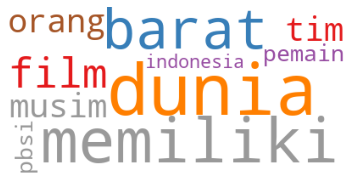

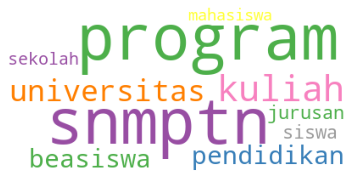

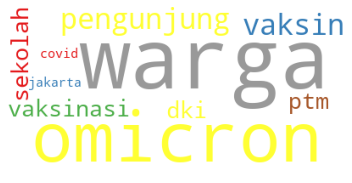

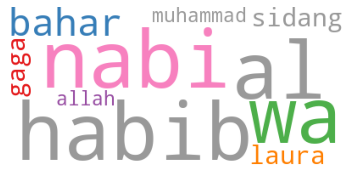

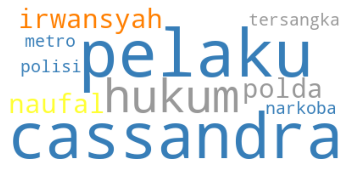

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


for index, topic in enumerate(lda_model.components_):
    tmps = [vect.get_feature_names()[i] for i in topic.argsort()[-10:]]
    text = " ".join(str(topik) for topik in tmps)
    wordcloud = WordCloud(max_words=10,colormap='Set1', background_color="white").generate(text)
    plt.figure(figsize=(5,5))
    plt.imshow(wordcloud)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
 

In [ ]:
data

,Unnamed: 0,Article Title,Article Link,Article Content,clean_article,cluster
0,1,\n 7 Hobi yang Bisa Datangkan C...,https://www.detik.com/edu/edutainment/d-588006...,Meski banyak orang menganggap hobi hanya seba...,orang menganggap hobi sebatas hiburan menghila...,0
1,2,"\n Perbanyak Ahli Gunung Api, I...",https://www.detik.com/edu/perguruan-tinggi/d-5...,Institut Teknologi Nasional (ITN) Yogyakarta m...,institut teknologi nasional itn yogyakarta mem...,0
2,3,\n PTM Terbatas 2022 di Jakarta...,https://www.detik.com/edu/sekolah/d-5880075/pt...,Pemerintah Provinsi DKI Jakarta melalui Kepala...,pemerintah provinsi dki jakarta kepala dinas p...,2
3,4,\n Mengapa Perlu Menjaga Kelest...,https://www.detik.com/edu/detikpedia/d-5879161...,Tanaman bakau adalah salah satu ekosistem yang...,tanaman bakau salah ekosistem tumbuh muara sun...,0
4,5,\n Cara Membuat Surat Lamaran K...,https://www.detik.com/edu/edutainment/d-587992...,Membuat Curriculum Vitae (CV) dan surat lamara...,curriculum vitae cv surat lamaran kerja efekti...,1
...,...,...,...,...,...,...
2429,2430,"\n Terbang ke Italia, Pembalap ...",https://sport.detik.com/fotosport/d-5895358/te...,Jakarta - Ikatan Motor Indonesia (IMI) melepas...,jakarta ikatan motor indonesia imi melepas sal...,0
2430,2431,\n IBL 2022 Sudah Bisa Ditonton...,https://sport.detik.com/basket/d-5894646/ibl-2...,Indonesia Basketball League (IBL) 2022 akhirny...,indonesia basketball league ibl dihadiri penon...,0
2431,2432,\n Pratama Arhan Digandrungi Fa...,https://sport.detik.com/detiktv/d-5894639/prat...,"Pemain sepak bola Indonesia, Pratama Arhan men...",pemain sepak bola indonesia pratama arhan mena...,0
2432,2433,\n Indonesia Patriots Tak Ingin...,https://sport.detik.com/basket/d-5894391/indon...,Indonesia Patriots diharapkan tampil baik di s...,indonesia patriots diharapkan tampil laga ibl ...,0


# 05 Student Activity

Silahkan pahami dengan baik Topic Modeling pipeline di atas, kemudian kerjakan soal di bawah ini:

1. Terapkan Topic Modeling Pipeline di atas pada data yang berbeda dan tarik kesimpulan topik yang anda dapatkan. 
2. Data bisa menggunakan ini <a href="https://docs.google.com/spreadsheets/d/1OvKGTnyE3LnP-E6dtwOSLa1IK-ZdrR_i/edit?usp=sharing&ouid=117844591790417079121&rtpof=true&sd=true"> Klik</a>
3. Presentasikan hasil anda di kelas (Coach akan menunjuk beberapa perwakilan untuk presentasi). Persiapkan dengan baik yah.